In [ ]:
import numpy as np
import scipy.io
import skimage.morphology as morph
from skimage.io import imread
from skimage.measure import label
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
%matplotlib inline

Vamos a leer una imagen y crear el elemento estructurante

In [ ]:
!wget -O imagen.png https://www.mathworks.com/help/images/morph_close.png

--2025-11-26 02:59:09--  https://www.mathworks.com/help/images/morph_close.png
Resolving www.mathworks.com (www.mathworks.com)... 104.66.96.60
Connecting to www.mathworks.com (www.mathworks.com)|104.66.96.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3783 (3.7K) [image/png]
Saving to: ‘imagen.png’

imagen.png          100%[===================>]   3.69K  --.-KB/s    in 0s      

2025-11-26 02:59:10 (676 MB/s) - ‘imagen.png’ saved [3783/3783]



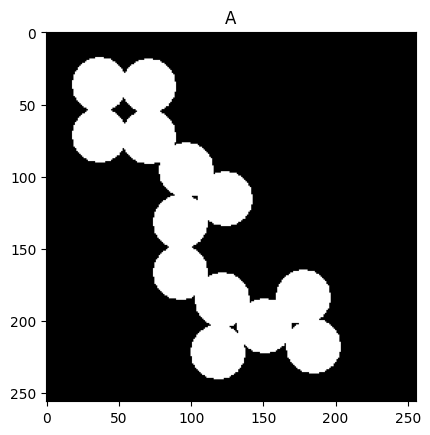

In [ ]:
A = imread('imagen.png')[:,:256,0]//255
plt.title("A")
plt.imshow(A, cmap='gray')
plt.show()

In [ ]:
B = morph.square(3)
B

/tmp/ipython-input-518395912.py:1: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  B = morph.square(3)


array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

Realicemos la siguiente operación $A - (A \ominus B)$

**Hint:** Recuerde que el operador $\ominus$ significa erosión binaria.

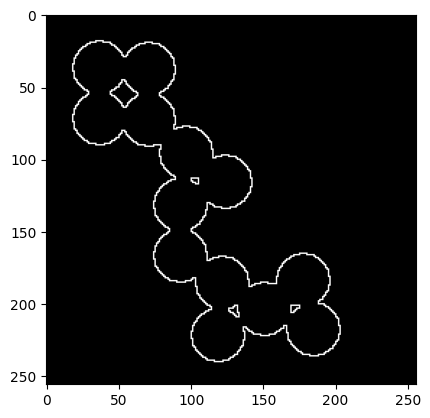

In [ ]:
im_result = A - morph.erosion(A,B)
plt.imshow(im_result, cmap='gray')

### **Ejercicio 1**

Genere una imagen de bordes en la que las líneas correspondan únicamente a círculos y no a círculos traslapados como se ve en la imagen anterior.

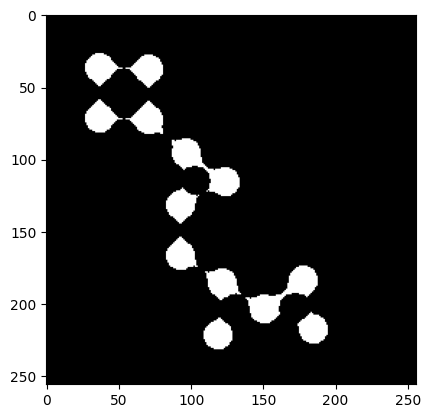

In [ ]:
im_result = morph.erosion(A, morph.disk(9))
plt.imshow(im_result, cmap='gray')

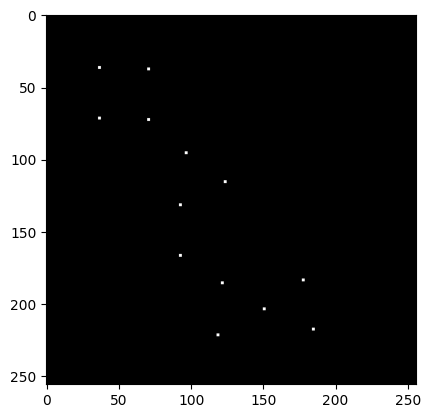

In [ ]:
im_result = morph.erosion(im_result, morph.disk(9))

plt.imshow(im_result, cmap='gray')

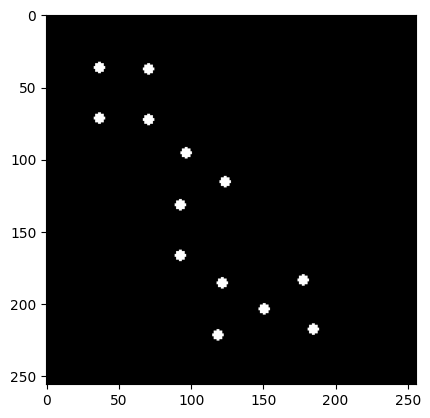

In [ ]:
im_result = morph.dilation(im_result, morph.disk(3))
plt.imshow(im_result, cmap='gray')

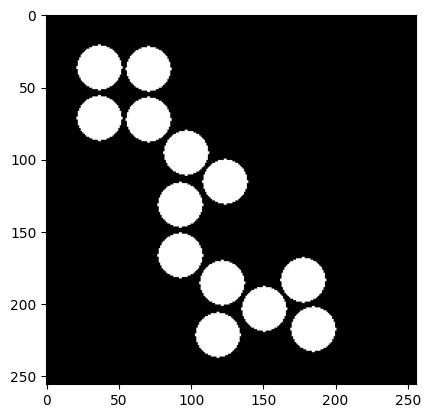

In [ ]:
im_result = morph.dilation(im_result, morph.disk(12))
plt.imshow(im_result, cmap='gray')

/tmp/ipython-input-627145691.py:1: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  im_result = im_result - morph.erosion(im_result, morph.square(3))


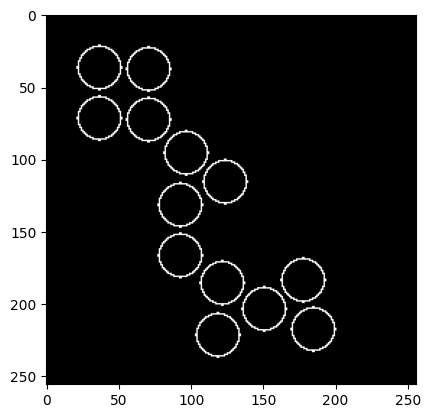

In [ ]:
im_result = im_result - morph.erosion(im_result, morph.square(3))

plt.imshow(im_result, cmap='gray')

/tmp/ipython-input-4032061421.py:9: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  im_result = im_result - morph.erosion(im_result, morph.square(3))


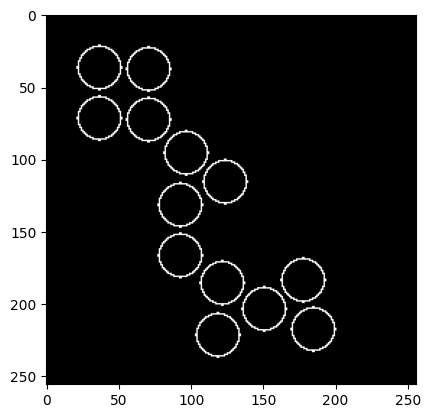

In [ ]:
#desarrolle su código aquí

im_result = morph.erosion(A, morph.disk(9))
im_result = morph.erosion(im_result, morph.disk(9))

im_result = morph.dilation(im_result, morph.disk(3))
im_result = morph.dilation(im_result, morph.disk(12))

im_result = im_result - morph.erosion(im_result, morph.square(3))

plt.imshow(im_result, cmap='gray')

### **Ejercicio 2**

Usando el resultado del ejercicio anterior, desarrolle una forma de controlar el grosor de la línea

/tmp/ipython-input-1353779523.py:13: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  im_result = im_result - morph.erosion(im_result, morph.square(2*line_width +1 ))


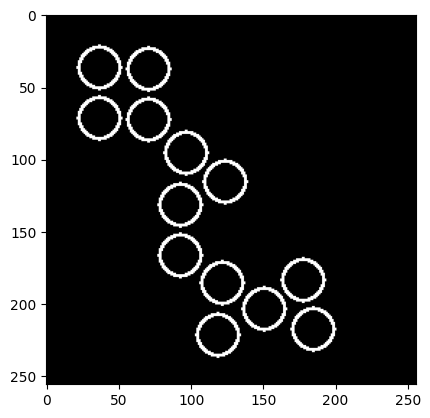

In [ ]:
#@title Controlar propiedades de la línea de borde { run: "auto" }
line_width = 2 #@param {type:"slider", min:1, max:10, step:1}

#desarrolle su código aquí

im_result = morph.erosion(A, morph.disk(9))
im_result = morph.erosion(im_result, morph.disk(9))

im_result = morph.dilation(im_result, morph.disk(3))
im_result = morph.dilation(im_result, morph.disk(12))

#im_result = im_result - morph.erosion(im_result, morph.square(2*line_width +1 ))
im_result = im_result - morph.erosion(im_result, morph.square(2*line_width +1 ))

plt.imshow(im_result, cmap='gray')